# Part 1 : Analysing the dataset and calculating the number of resources required

In [2]:
#import packages

import pandas as pd
import numpy as np
!pip install xlrd
import xlrd

#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# The code was removed by Watson Studio for sharing.

,Branch,State,Population,Market Share (upto 60%),Accounts with Bank,Location X,Location Y,Resource Category,Resource Name,Target,...,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Agartala,Tripura,200600,0.39,78234.0,23.84,91.28,SO,Resource150,75,...,60,50,53,52,67,52,64,47,41,23
1,Agartala,Tripura,200600,0.39,78234.0,23.84,91.28,SO,Resource319,75,...,64,56,59,58,71,80,72,61,72,74
2,agra,Uttar Pradesh,1334900,0.08,106792.0,27.19,78.00,SO,Resource21,75,...,85,67,71,78,66,81,87,101,121,120
3,Ahmadabad,Gujarat,3724300,0.43,1601449.0,23.03,72.59,SO,Resource7,75,...,126,107,117,100,89,107,92,91,84,68
4,Ahmadabad,Gujarat,3724300,0.43,1601449.0,23.03,72.59,SO,Resource220,75,...,95,94,78,79,60,73,83,81,88,107


In [4]:
# Checking for any Null values
df_data_1.isnull().any()

Branch                     False
State                      False
Population                 False
Market Share (upto 60%)    False
Accounts with Bank         False
Location X                 False
Location Y                 False
Resource Category          False
Resource Name              False
Target                     False
Jan                        False
Feb                        False
Mar                        False
Apr                        False
May                        False
Jun                        False
Jul                        False
Aug                        False
Sep                        False
Oct                        False
Nov                        False
Dec                        False
dtype: bool

In [5]:
# Calculating the required Columns
df_data_1['Total'] = df_data_1['Jan']+df_data_1['Feb']+df_data_1['Mar']+df_data_1['Apr']+df_data_1['May']+df_data_1['Jun']+df_data_1['Jul']+df_data_1['Aug']+df_data_1['Sep']+df_data_1['Oct']+df_data_1['Nov']+df_data_1['Dec']
df_data_1['Catchment Area']=df_data_1['Population']-df_data_1['Accounts with Bank']
df_data_1['Avg Productivity']=df_data_1['Total']/12
df_data_1['Avg Productivity'] = df_data_1['Avg Productivity'].round()
df_data_1['No of resources in a branch']= df_data_1.groupby('Branch')['Branch'].transform('count')

df_data_1.head()

,Branch,State,Population,Market Share (upto 60%),Accounts with Bank,Location X,Location Y,Resource Category,Resource Name,Target,...,Jul,Aug,Sep,Oct,Nov,Dec,Total,Catchment Area,Avg Productivity,No of resources in a branch
0,Agartala,Tripura,200600,0.39,78234.0,23.84,91.28,SO,Resource150,75,...,67,52,64,47,41,23,639,122366.0,53.0,2
1,Agartala,Tripura,200600,0.39,78234.0,23.84,91.28,SO,Resource319,75,...,71,80,72,61,72,74,797,122366.0,66.0,2
2,agra,Uttar Pradesh,1334900,0.08,106792.0,27.19,78.00,SO,Resource21,75,...,66,81,87,101,121,120,1079,1228108.0,90.0,1
3,Ahmadabad,Gujarat,3724300,0.43,1601449.0,23.03,72.59,SO,Resource7,75,...,89,107,92,91,84,68,1208,2122851.0,101.0,2
4,Ahmadabad,Gujarat,3724300,0.43,1601449.0,23.03,72.59,SO,Resource220,75,...,60,73,83,81,88,107,1003,2122851.0,84.0,2


In [6]:
df_data_1.describe()

,Population,Market Share (upto 60%),Accounts with Bank,Location X,Location Y,Target,Jan,Feb,Mar,Apr,...,Jul,Aug,Sep,Oct,Nov,Dec,Total,Catchment Area,Avg Productivity,No of resources in a branch
count,3.400000e+02,340.000000,3.400000e+02,340.000000,340.000000,340.0,340.000000,340.000000,340.000000,340.000000,...,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,340.000000,3.400000e+02,340.000000,340.000000
mean,8.960291e+05,0.283618,2.944977e+05,22.082029,78.976206,75.0,82.867647,82.802941,83.141176,82.476471,...,83.629412,83.870588,83.852941,86.017647,85.255882,85.188235,1005.420588,6.015315e+05,83.785294,2.476471
std,1.749113e+06,0.180398,8.787901e+05,6.428686,4.620330,0.0,18.344221,21.738307,23.716319,26.025788,...,34.712528,35.919868,36.689668,38.258008,39.956789,40.440274,335.484895,1.018729e+06,27.971083,0.596973
min,1.002860e+05,0.010000,1.808000e+03,8.180000,70.790000,75.0,50.000000,34.000000,26.000000,17.000000,...,6.000000,1.000000,0.000000,1.000000,0.000000,2.000000,233.000000,5.114586e+04,19.000000,1.000000
25%,2.242000e+05,0.117500,4.745600e+04,17.340000,76.250000,75.0,67.000000,66.000000,66.000000,64.000000,...,61.000000,59.000000,57.750000,59.000000,59.000000,55.750000,763.750000,1.544680e+05,63.750000,2.000000
50%,4.060000e+05,0.280000,9.087000e+04,23.215000,77.530000,75.0,81.000000,84.000000,84.000000,82.000000,...,84.000000,83.000000,82.000000,84.000000,84.000000,82.000000,999.500000,2.985440e+05,83.000000,3.000000
75%,8.569000e+05,0.450000,2.500290e+05,27.500000,80.460000,75.0,97.250000,99.000000,100.000000,101.000000,...,106.250000,108.000000,110.000000,112.000000,114.000000,111.000000,1243.500000,5.000985e+05,104.000000,3.000000
max,1.262250e+07,0.600000,7.573500e+06,34.090000,93.940000,75.0,115.000000,133.000000,153.000000,168.000000,...,183.000000,191.000000,179.000000,188.000000,205.000000,220.000000,1922.000000,6.537571e+06,160.000000,4.000000


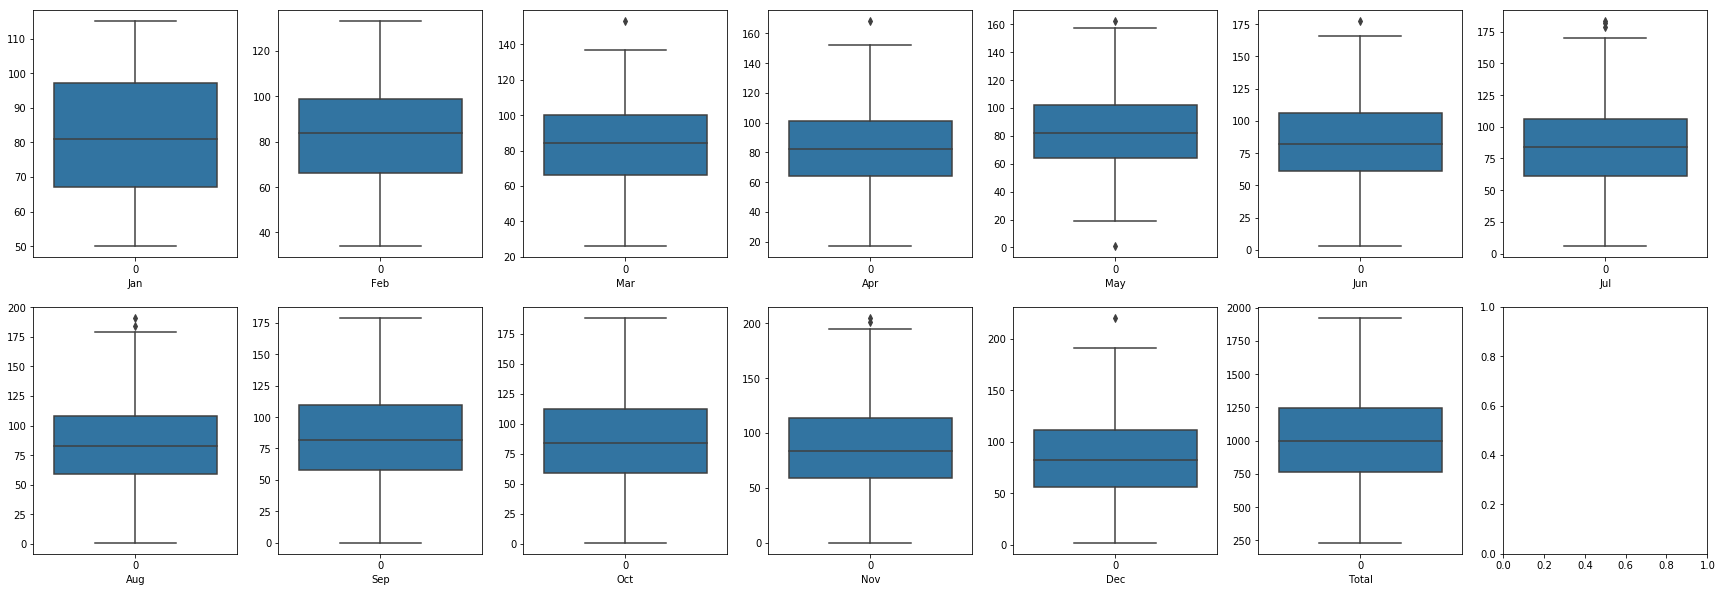

In [7]:
#Verifying outliers in individual monthly sourcing

df_n=df_data_1[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','Total']] 

import seaborn as sns

fig,axes =plt.subplots(2,7, figsize=(30, 10))
ax=axes.ravel()
i=0

for column in df_n.columns:
    sns.boxplot(data=df_n[column],ax=ax[i])
    ax[i].set_xlabel(list(df_n.columns)[i])
    i +=1
plt.show()  

### The accounts sourcing apprears to be consistent throught the months

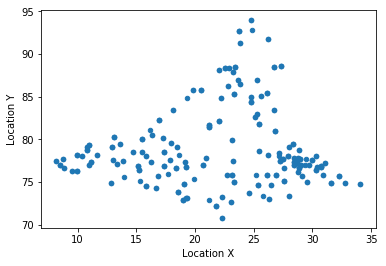

In [8]:
#Distribution for bank branch locations in the country by lat and Long co-ordinates

df_data_1.plot(kind='scatter', x= 'Location X', y= 'Location Y')
plt.show()

In [9]:
## Enabling user input feild to achive targeted growth in future period

Growth_rate = int(input("Enter the expected growth rate in %: "))/100
#Growth_rate1 = print(gro)
Duration_in_years = int(input("Enter the duration in years target to achieve above growth: "))
#Duration_in_years = print(dur)

df_data_1['Growth in Market Share'] = Growth_rate * df_data_1['Catchment Area']
df_data_1['Avg Productivity'] = df_data_1['Avg Productivity'].round()
df_data_1.head(10)

Enter the expected growth rate in %: 5
Enter the duration in years target to achieve above growth: 3


,Branch,State,Population,Market Share (upto 60%),Accounts with Bank,Location X,Location Y,Resource Category,Resource Name,Target,...,Aug,Sep,Oct,Nov,Dec,Total,Catchment Area,Avg Productivity,No of resources in a branch,Growth in Market Share
0,Agartala,Tripura,200600,0.39,78234.0,23.84,91.28,SO,Resource150,75,...,52,64,47,41,23,639,122366.0,53.0,2,6118.30
1,Agartala,Tripura,200600,0.39,78234.0,23.84,91.28,SO,Resource319,75,...,80,72,61,72,74,797,122366.0,66.0,2,6118.30
2,agra,Uttar Pradesh,1334900,0.08,106792.0,27.19,78.00,SO,Resource21,75,...,81,87,101,121,120,1079,1228108.0,90.0,1,61405.40
3,Ahmadabad,Gujarat,3724300,0.43,1601449.0,23.03,72.59,SO,Resource7,75,...,107,92,91,84,68,1208,2122851.0,101.0,2,106142.55
4,Ahmadabad,Gujarat,3724300,0.43,1601449.0,23.03,72.59,SO,Resource220,75,...,73,83,81,88,107,1003,2122851.0,84.0,2,106142.55
5,Ahmadnagar,Maharashtra,325700,0.40,130280.0,19.09,74.74,SO,Resource100,75,...,83,81,82,97,107,1142,195420.0,95.0,3,9771.00
6,Ahmadnagar,Maharashtra,325700,0.40,130280.0,19.09,74.74,SO,Resource100,75,...,60,75,92,104,106,1016,195420.0,85.0,3,9771.00
7,Ahmadnagar,Maharashtra,325700,0.40,130280.0,19.09,74.74,SO,Resource286,75,...,95,89,108,126,140,1069,195420.0,89.0,3,9771.00
8,Aizawl,Mizoram,243400,0.15,36510.0,23.74,92.71,SO,Resource133,75,...,99,111,114,116,109,1102,206890.0,92.0,3,10344.50
9,Aizawl,Mizoram,243400,0.15,36510.0,23.74,92.71,SO,Resource133,75,...,100,91,82,77,79,1067,206890.0,89.0,3,10344.50


In [10]:
#Grouping a pivot table to group data from resource level to Branch level

from pandas import *

pivottable = pivot_table(df_data_1, index=['Branch','State'], values=['Population','Accounts with Bank','Catchment Area','Location X','Location Y','Avg Productivity', 'Growth in Market Share','No of resources in a branch'], aggfunc=np.average).reset_index()
pivottable['Avg Productivity'] = pivottable['Avg Productivity'].round()
pivottable.head()


,Branch,State,Accounts with Bank,Avg Productivity,Catchment Area,Growth in Market Share,Location X,Location Y,No of resources in a branch,Population
0,Agartala,Tripura,78234.0,60.0,122366.0,6118.30,23.84,91.28,2,200600
1,Ahmadabad,Gujarat,1601449.0,92.0,2122851.0,106142.55,23.03,72.59,2,3724300
2,Ahmadnagar,Maharashtra,130280.0,90.0,195420.0,9771.00,19.09,74.74,3,325700
3,Aizawl,Mizoram,36510.0,96.0,206890.0,10344.50,23.74,92.71,3,243400
4,Ajmer,Rajasthan,118220.0,66.0,395780.0,19789.00,26.45,74.64,2,514000


In [11]:
#Calculating the estimated number of resources required in a branch basis the existing population of the city 

pivottable['Resources required'] = ((pivottable['Growth in Market Share']/pivottable['Avg Productivity']/(Duration_in_years * 12))-pivottable['No of resources in a branch']).round(0)
pivottable


,Branch,State,Accounts with Bank,Avg Productivity,Catchment Area,Growth in Market Share,Location X,Location Y,No of resources in a branch,Population,Resources required
0,Agartala,Tripura,78234.00,60.0,122366.00,6118.3000,23.84,91.28,2,200600,1.0
1,Ahmadabad,Gujarat,1601449.00,92.0,2122851.00,106142.5500,23.03,72.59,2,3724300,30.0
2,Ahmadnagar,Maharashtra,130280.00,90.0,195420.00,9771.0000,19.09,74.74,3,325700,0.0
3,Aizawl,Mizoram,36510.00,96.0,206890.00,10344.5000,23.74,92.71,3,243400,-0.0
4,Ajmer,Rajasthan,118220.00,66.0,395780.00,19789.0000,26.45,74.64,2,514000,6.0
5,Akola,Maharashtra,135616.00,61.0,288184.00,14409.2000,20.71,77.00,3,423800,4.0
6,Alappuzha,Kerala,41272.00,94.0,146328.00,7316.4000,9.49,76.33,2,187600,0.0
7,Aligarh,Uttar Pradesh,374922.00,89.0,332478.00,16623.9000,27.88,78.07,3,707400,2.0
8,Allahabad,Uttar Pradesh,304268.00,66.0,744932.00,37246.6000,25.44,81.84,3,1049200,13.0
9,Alwar,Rajasthan,57897.00,76.0,217803.00,10890.1500,27.57,76.61,2,275700,2.0


In [12]:
#User based search function to view the dashboard by a single or group of Branches.

user_input = input("Enter the Branch to view productivity: ")
data=[user_input]
#data=['Agartala','Bikaner','Patna','Srinagar','Vellore']
predict_data = pd.DataFrame(data, columns = ['Branch'])
result=pd.merge(predict_data,pivottable)[['Branch','Catchment Area','No of resources in a branch','Avg Productivity','Resources required']]
result

Enter the Branch to view productivity: Agartala


,Branch,Catchment Area,No of resources in a branch,Avg Productivity,Resources required
0,Agartala,122366.0,2,60.0,1.0


# Part 2 : Generating a Statewise Choropleth map to display priority areas for hiring

In [13]:

!pip install folium
import folium as folium

database_state = pd.DataFrame(pivottable.groupby('State').sum()).reset_index() #Create a statewise database
database_state

     |████████████████████████████████| 92kB 8.1MB/s eta 0:00:011


,State,Accounts with Bank,Avg Productivity,Catchment Area,Growth in Market Share,Location X,Location Y,No of resources in a branch,Population,Resources required
0,Andhra Pradesh,1529966.70,1222.0,8971138.30,448556.9150,246.31,1194.69,31,10501105,143.0
1,Assam,472282.00,173.0,534618.00,26730.9000,51.01,184.56,3,1006900,5.0
2,Bihar,1105921.00,480.0,2367579.00,118378.9500,126.53,426.83,13,3473500,28.0
3,Chandigarh,351329.00,86.0,505571.00,25278.5500,30.74,76.79,3,856900,5.0
4,Chhattisgarh,651421.00,308.0,857379.00,42868.9500,64.52,245.22,9,1508800,3.0
5,Delhi,5296181.47,149.0,5961651.53,298082.5765,57.25,154.43,6,11257833,110.0
6,Gujarat,3058088.00,453.0,6193712.00,309685.6000,110.59,361.57,10,9251800,89.0
7,Haryana,915127.00,820.0,2337673.00,116883.6500,322.35,842.44,25,3252800,21.0
8,Himachal Pradesh,16566.00,108.0,134034.00,6701.7000,31.10,77.17,2,150600,0.0
9,Jammu and Kashmir,305558.00,166.0,1043442.00,52172.1000,66.83,149.68,4,1349000,13.0


In [14]:
!wget --quiet https://gist.githubusercontent.com/ProProgrammer/781d5fbcb1d4364616c5/raw/fc8dbc93c1f55e5085c325036b5955f2948d886a/states2.json
 
print('GeoJSON file downloaded!')

indiancities = 'states2.json' # geojson file

# create a plain world map
India_map = folium.Map(location=[21, 78], zoom_start=5, tiles='CartoDB dark_matter')

folium.Choropleth(geo_data=indiancities, data=database_state,
         columns=['State','Resources required'],
         key_on='feature.id',
         fill_color='Blues',
         fill_opacity=0.8,
         line_opacity=0.2,
         legend_name='Resources required').add_to(India_map)
         
#https://python-visualization.github.io/folium/quickstart.html#GeoJSON/TopoJSON-Overlays
# display map
India_map

GeoJSON file downloaded!


# Part 3 : Regression analysis to forecast the productivity for new hired resources

In [15]:
# We will implement a cluster based approach with KNN algorithm to train the model with independent variables as location co-ordinates from existing database.
# The model shall be able to predict the productivity for new hires within a cluster.

In [16]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

pivottable.columns

Index(['Branch', 'State', 'Accounts with Bank', 'Avg Productivity',
       'Catchment Area', 'Growth in Market Share', 'Location X', 'Location Y',
       'No of resources in a branch', 'Population', 'Resources required'],
      dtype='object')

In [17]:
X = pivottable[['Location X', 'Location Y']].values.astype(float)
X[0:5]

array([[23.84, 91.28],
       [23.03, 72.59],
       [19.09, 74.74],
       [23.74, 92.71],
       [26.45, 74.64]])

In [18]:
y = pivottable['Avg Productivity'].values
y[0:5]

array([60., 92., 90., 96., 66.])

In [19]:
#Splitting the database into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (119, 2) (119,)
Test set: (30, 2) (30,)


In [20]:
#Implementing the KNN algorithm

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

Ks = 60
err = np.zeros((Ks-1))

ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsRegressor(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    err[n-1]= mean_absolute_error(y_test, yhat)

err

array([15.56666667, 18.71666667, 19.96666667, 18.94166667, 18.43333333,
       17.70555556, 18.43333333, 18.36666667, 17.66666667, 17.18666667,
       17.11515152, 17.18611111, 17.22564103, 17.23809524, 17.25555556,
       17.21875   , 17.39607843, 17.42037037, 17.53859649, 17.19166667,
       16.75238095, 16.6530303 , 16.43478261, 16.15833333, 16.08133333,
       16.24615385, 16.05679012, 16.03809524, 16.1183908 , 16.42666667,
       16.32365591, 16.35      , 16.35454545, 16.17254902, 16.3352381 ,
       16.4212963 , 16.56126126, 16.58070175, 16.55128205, 16.46083333,
       16.39430894, 16.24365079, 16.26976744, 16.325     , 16.38592593,
       16.34130435, 16.33475177, 16.42013889, 16.45986395, 16.49333333,
       16.43333333, 16.40384615, 16.41949686, 16.42407407, 16.43030303,
       16.41845238, 16.31812865, 16.35632184, 16.32090395])

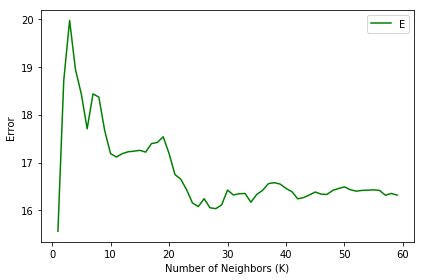

In [21]:
# PLotting the error levels for differrnt values of clusters 'K'

plt.plot(range(1,Ks),err,'g')
#plt.fill_between(range(1,Ks),err - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Error for values of K '))
plt.ylabel('Error ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [22]:
print( "The best accuracy was with", err.min(), "with k=", err.argmin()+1) 

The best accuracy was with 15.566666666666666 with k= 1
